<a href="https://colab.research.google.com/github/abdallahgamal5500/House-Price-Prediction/blob/main/neolen_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('data.csv')

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [ ]:
def dropMostNullCoulmns(df):
  x = ((df.isna().sum()/1259)*100) > 40
  result = list()
  for i in x.keys():
      if (x[i]==True):
        result.append(i)
  return df.drop(columns=result)

In [ ]:
dataset = dropMostNullCoulmns(dataset)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [ ]:
dataset.drop(columns=['Id','BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace=True)
dataset.drop(columns=['MasVnrArea','BsmtFinSF1','2ndFlrSF','WoodDeckSF','OpenPorchSF'],inplace=True)
dataset.drop(columns=['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt'],inplace=True)

In [ ]:
numerical_data = dataset.select_dtypes(exclude=["object_"])
categorical_data = dataset.select_dtypes(include=['object'])
num_cols = dataset.select_dtypes(exclude=["object_"]).columns
cat_cols = dataset.select_dtypes(include=['object']).columns

In [ ]:
numerical_data.to_csv('numerical_data.csv',index = False)
categorical_data.to_csv('categorical_data.csv',index = False)

In [ ]:
def replaceColumnZeros(df,colsName):
  for col in colsName:
    x = df[np.logical_and(df[col]!=0,df[col]!=np.nan)][col]
    x = x.sum()/x.count()
    df[col] = df.replace(0, x)[col]

In [ ]:
replaceColumnZeros(dataset,num_cols)

In [ ]:
dataset['LotFrontage'] = dataset.fillna(dataset['LotFrontage'].mean())['LotFrontage']

In [ ]:
dataset[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1259 non-null   int64  
 1   LotFrontage   1259 non-null   float64
 2   LotArea       1259 non-null   int64  
 3   OverallQual   1259 non-null   int64  
 4   OverallCond   1259 non-null   int64  
 5   BsmtUnfSF     1259 non-null   float64
 6   TotalBsmtSF   1259 non-null   float64
 7   1stFlrSF      1259 non-null   int64  
 8   GrLivArea     1259 non-null   int64  
 9   BsmtFullBath  1259 non-null   float64
 10  BsmtHalfBath  1259 non-null   float64
 11  FullBath      1259 non-null   float64
 12  HalfBath      1259 non-null   float64
 13  BedroomAbvGr  1259 non-null   float64
 14  KitchenAbvGr  1259 non-null   float64
 15  TotRmsAbvGrd  1259 non-null   int64  
 16  Fireplaces    1259 non-null   float64
 17  GarageCars    1259 non-null   float64
 18  GarageArea    1259 non-null 

In [ ]:
dataset[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1259 non-null   object
 1   Street         1259 non-null   object
 2   LotShape       1259 non-null   object
 3   LandContour    1259 non-null   object
 4   Utilities      1259 non-null   object
 5   LotConfig      1259 non-null   object
 6   LandSlope      1259 non-null   object
 7   Neighborhood   1259 non-null   object
 8   Condition1     1259 non-null   object
 9   Condition2     1259 non-null   object
 10  BldgType       1259 non-null   object
 11  HouseStyle     1259 non-null   object
 12  RoofStyle      1259 non-null   object
 13  RoofMatl       1259 non-null   object
 14  Exterior1st    1259 non-null   object
 15  Exterior2nd    1259 non-null   object
 16  MasVnrType     1252 non-null   object
 17  ExterQual      1259 non-null   object
 18  ExterCond      1259 non-null

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1258
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1151 non-null   int64  
 1   MSZoning       1151 non-null   object 
 2   LotFrontage    1151 non-null   float64
 3   LotArea        1151 non-null   int64  
 4   Street         1151 non-null   object 
 5   LotShape       1151 non-null   object 
 6   LandContour    1151 non-null   object 
 7   Utilities      1151 non-null   object 
 8   LotConfig      1151 non-null   object 
 9   LandSlope      1151 non-null   object 
 10  Neighborhood   1151 non-null   object 
 11  Condition1     1151 non-null   object 
 12  Condition2     1151 non-null   object 
 13  BldgType       1151 non-null   object 
 14  HouseStyle     1151 non-null   object 
 15  OverallQual    1151 non-null   int64  
 16  OverallCond    1151 non-null   int64  
 17  RoofStyle      1151 non-null   object 
 18  RoofMatl

In [ ]:
def encodeCatColumns(df,colsName):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  result1 = np.empty((df.shape[0], 0), int)
  for i in colsName:
    if len(df[i].unique()) <= 2:
      result1 = np.concatenate((result1,np.reshape(le.fit_transform(df[i]), (df.shape[0],1))),axis=1)
    else:
      result1 = np.concatenate((result1,np.array(pd.get_dummies(df[i]))),axis=1)
  return result1

In [ ]:
x = pd.get_dummies(dataset)
y = dataset['SalePrice']
x.drop(columns=['SalePrice'],inplace=True)

In [ ]:
print(x.shape)

(1151, 245)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.fit_transform(x_val)
x_test = sc.transform(x_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(245, input_dim=245, kernel_initializer='normal', activation='linear', btch))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), validation_batch_size = 16 ,batch_size = 16, epochs = 1000)

Epoch 1/1000
55/55 [==============================] - 1s 7ms/step - loss: 41799692288.0000 - val_loss: 39051370496.0000
Epoch 2/1000
55/55 [==============================] - 0s 4ms/step - loss: 41795497984.0000 - val_loss: 39043997696.0000
Epoch 3/1000
55/55 [==============================] - 0s 4ms/step - loss: 41785098240.0000 - val_loss: 39029047296.0000
Epoch 4/1000
55/55 [==============================] - 0s 5ms/step - loss: 41767055360.0000 - val_loss: 39006072832.0000
Epoch 5/1000
55/55 [==============================] - 0s 5ms/step - loss: 41740824576.0000 - val_loss: 38976335872.0000
Epoch 6/1000
55/55 [==============================] - 0s 4ms/step - loss: 41707220992.0000 - val_loss: 38937694208.0000
Epoch 7/1000
55/55 [==============================] - 0s 4ms/step - loss: 41666191360.0000 - val_loss: 38890397696.0000
Epoch 8/1000
55/55 [==============================] - 0s 4ms/step - loss: 41619271680.0000 - val_loss: 38837829632.0000
Epoch 9/1000
55/55 [====================

In [ ]:
y_pred = model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((np.array(y_pred).reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[183572.38 190000.  ]
 [489368.97 555000.  ]
 [162685.72 157000.  ]
 [196380.02 185000.  ]
 [143206.12 127500.  ]
 [166294.55 143000.  ]
 [229958.22 237000.  ]
 [117567.77  95000.  ]
 [328328.44 320000.  ]
 [243383.75 254900.  ]
 [177315.23 165000.  ]
 [160339.73 163900.  ]
 [187679.34 180000.  ]
 [207022.44 197900.  ]
 [202650.12 206000.  ]
 [456487.59 485000.  ]
 [235725.45 239000.  ]
 [366566.72 319000.  ]
 [243071.45 230000.  ]
 [198898.08 189000.  ]
 [176536.7  180500.  ]
 [296143.34 264132.  ]
 [265099.91 222000.  ]
 [204445.   167000.  ]
 [199936.02 234000.  ]
 [209990.14 187500.  ]
 [146127.38 143900.  ]
 [252726.44 272000.  ]
 [136194.66 129900.  ]
 [140181.45 130000.  ]
 [169317.89 150000.  ]
 [302909.41 255500.  ]
 [136527.08 131400.  ]
 [237009.73 201000.  ]
 [234782.11 235128.  ]
 [155144.97 140000.  ]
 [134748.47 152000.  ]
 [196464.14 155000.  ]
 [127211.34 131500.  ]
 [127250.57 132000.  ]
 [154120.98 160200.  ]
 [128871.37 146000.  ]
 [293595.16 257500.  ]
 [221175.64

In [ ]:
for i in range(len(y_pred)):
  print("pred: {:.2f} ".format(float(y_pred[i])),end = "")
  print("real: {:.2f}".format(np.array(y_test)[i]),end = "")
  print("")

pred: 183572.38 real: 190000.00
pred: 489368.97 real: 555000.00
pred: 162685.72 real: 157000.00
pred: 196380.02 real: 185000.00
pred: 143206.12 real: 127500.00
pred: 166294.55 real: 143000.00
pred: 229958.22 real: 237000.00
pred: 117567.77 real: 95000.00
pred: 328328.44 real: 320000.00
pred: 243383.75 real: 254900.00
pred: 177315.23 real: 165000.00
pred: 160339.73 real: 163900.00
pred: 187679.34 real: 180000.00
pred: 207022.44 real: 197900.00
pred: 202650.12 real: 206000.00
pred: 456487.59 real: 485000.00
pred: 235725.45 real: 239000.00
pred: 366566.72 real: 319000.00
pred: 243071.45 real: 230000.00
pred: 198898.08 real: 189000.00
pred: 176536.70 real: 180500.00
pred: 296143.34 real: 264132.00
pred: 265099.91 real: 222000.00
pred: 204445.00 real: 167000.00
pred: 199936.02 real: 234000.00
pred: 209990.14 real: 187500.00
pred: 146127.38 real: 143900.00
pred: 252726.44 real: 272000.00
pred: 136194.66 real: 129900.00
pred: 140181.45 real: 130000.00
pred: 169317.89 real: 150000.00
pred: 302

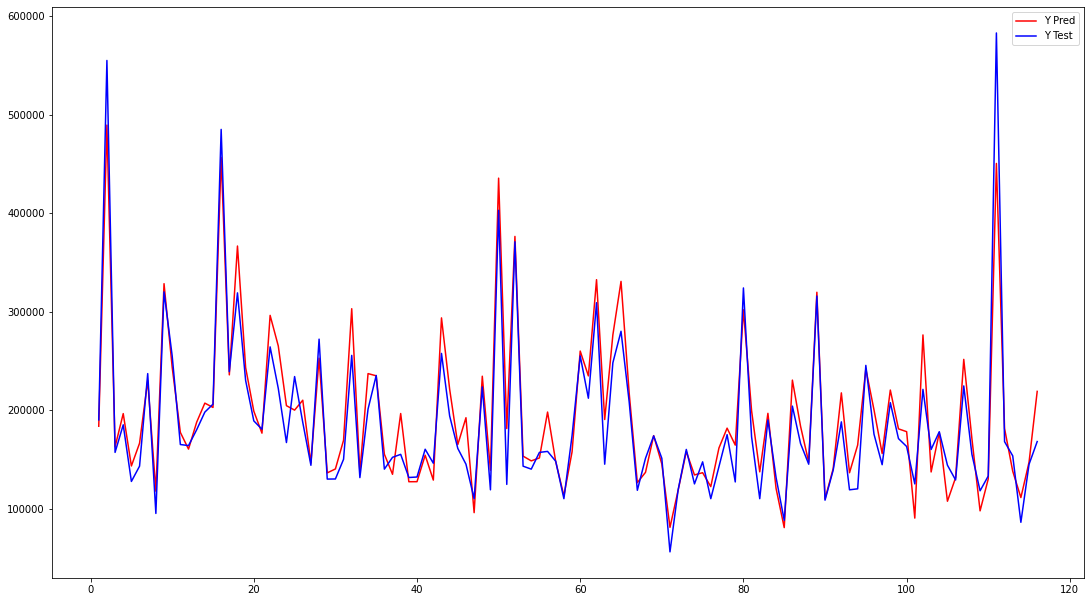

In [ ]:
fig = plt.gcf()
x = np.arange(1,len(y_pred)+1)
plt.plot(x,y_pred, color = 'r', label='Y Pred')
plt.plot(x,y_test, color = 'b', label='Y Test')
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9009226798293906